In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

### 1) IMPORT DATA

In [9]:
ds =pd.read_csv(r"D:\DATA SCIENCE\TASKS\irisdata.csv")

In [10]:
ds.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
ds.shape

(150, 5)

In [12]:
ds.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
ds.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

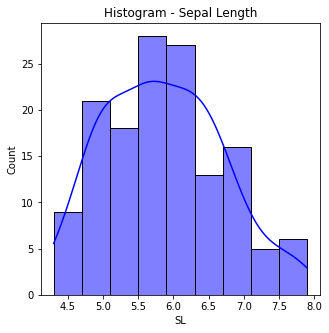

In [16]:
fig,ax =plt.subplots(figsize=(5,5))
sns.histplot(ds['SL'], color='blue', kde='true')
plt.title('Histogram - Sepal Length')
plt.show()

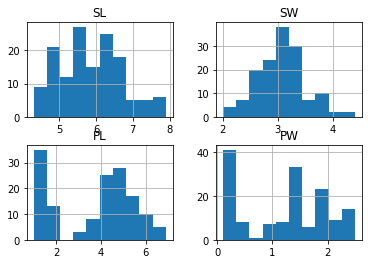

In [18]:
ds.hist()
plt.show()

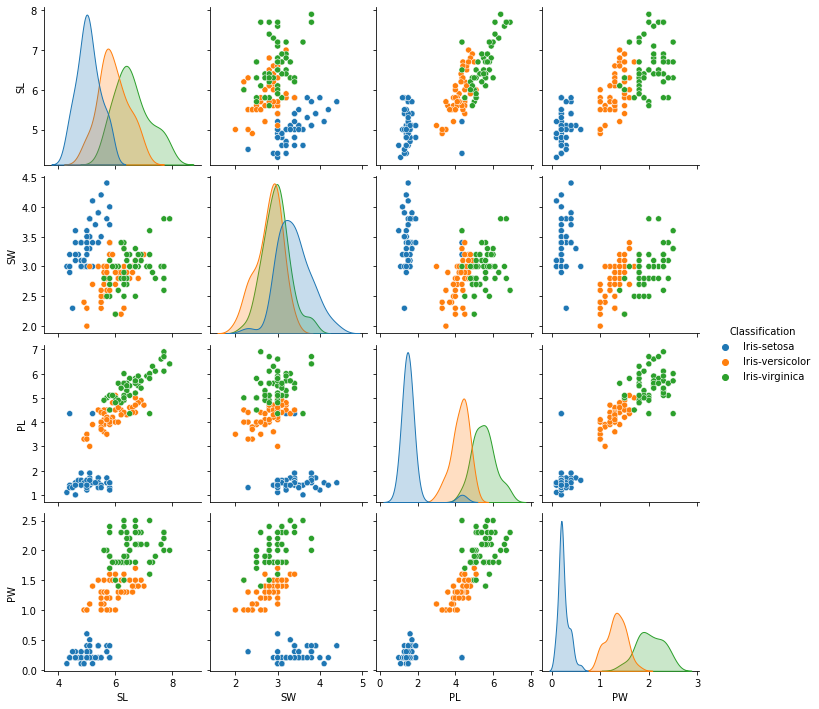

In [41]:
#Visualize the whole dataset
sns.pairplot(ds, hue='Classification')

In [19]:
print("Mean:Computed column-wise:")
meanData = ds.mean()
print(meanData)

Mean:Computed column-wise:
SL    5.855944
SW    3.049306
PL    3.756250
PW    1.198667
dtype: float64


C:\Users\qrs\AppData\Local\Temp/ipykernel_10624/3273815166.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meanData = ds.mean()


In [20]:
print("Median:Computed column-wise:")
medianData = ds.median()
print(medianData)

Median:Computed column-wise:
SL    5.80
SW    3.00
PL    4.35
PW    1.30
dtype: float64


C:\Users\qrs\AppData\Local\Temp/ipykernel_10624/2593700697.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianData = ds.median()


In [21]:
print("Mode:Computed column-wise:")
modeData = ds.mode()
print(modeData)

Mode:Computed column-wise:
    SL   SW   PL   PW   Classification
0  5.0  3.0  1.5  0.2      Iris-setosa
1  NaN  NaN  NaN  NaN  Iris-versicolor
2  NaN  NaN  NaN  NaN   Iris-virginica


### 2) PRE PROCESS DATA

In [28]:
ds['SL'] = ds['SL'].fillna(ds['SL'].median())

In [31]:
ds['SW'] = ds['SW'].fillna(ds['SW'].median())

In [32]:
ds['PL'] = ds['PL'].fillna(ds['PL'].median())

In [33]:
ds.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### 3) Find out which classification model gives the best result to predict iris species

In [44]:
def pre_processing(ds):
    X = ds[['SL', 'SW', 'PL', 'Pet']]
    y = ds['Classification']

    xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33)
    
    return  xtrain,xtest, ytrain, ytest

In [45]:
xtrain,xtest, ytrain, ytest = pre_processing(ds)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

LR 0.929590017825312
CART 0.9396910279263221
KNN 0.9396910279263221
NB 0.9598930481283423
LDA 0.9497920380273323
SVM 0.929590017825312
[array([0.97058824, 0.87878788, 0.93939394]), array([0.97058824, 0.87878788, 0.96969697]), array([0.97058824, 0.90909091, 0.93939394]), array([0.97058824, 0.93939394, 0.96969697]), array([0.97058824, 0.90909091, 0.96969697]), array([0.97058824, 0.87878788, 0.93939394])]


C:\Users\qrs\AppData\Local\Temp/ipykernel_10624/3506290042.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modelnames)


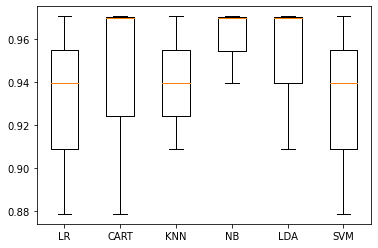

In [55]:
# Building Models for iris flower classification

np.random.seed(1000)
# making a list of ml classification models
models = []

def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('CART',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC()) )

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(xtrain,xtest, ytrain, ytest)

In [56]:
for name,model in models:
    trainedmodel = model.fit(xtrain,ytrain)
    
    # prediction
    ypredict = trainedmodel.predict(xtest)
    
    acc = accuracy_score(ytest,ypredict)
    classreport = classification_report(ytest,ypredict)
    confMat = confusion_matrix(ytest,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)

C:\Users\qrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



****************************LR
The accuracy: 0.94
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50

The Confusion Matrix:
 [[15  0  0]
 [ 0 15  1]
 [ 0  2 17]]

****************************CART
The accuracy: 0.94
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.

# SVM algorithm is the most accurate model to predict the Iris species

## 3. Simple Random Forest - Iris Dataset

In [57]:
from sklearn.model_selection import train_test_split

X = ds[['SL', 'SW', 'PL', 'PW']]
y = ds['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [69]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888
